In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai import * 
from fastai.vision import *

In [2]:
path = Path("/kaggle/input/nigerianfooddataset/NigerianFood 3/")

In [5]:
np.random.seed(23)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, size=320)

In [6]:
data.classes

['Afang Soup',
 'Akara',
 'Bread',
 'Egusi',
 'Moi Moi',
 'Oha Soup',
 'Rice and stew',
 'yam']

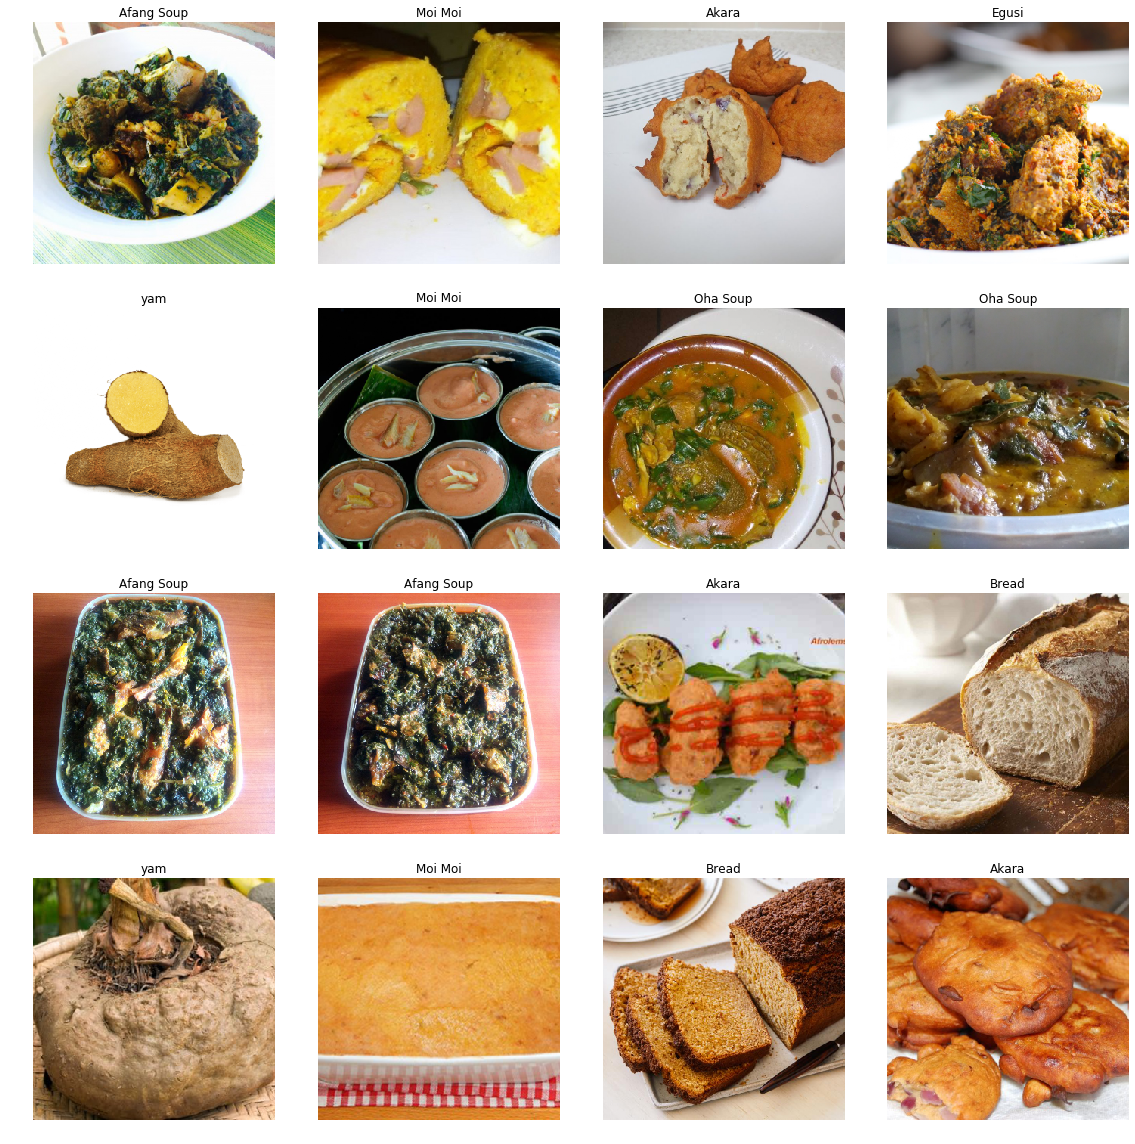

In [8]:
data.show_batch(rows=4)

In [9]:
model = cnn_learner(data, models.resnet50, metrics=accuracy, path=".")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:15<00:00, 6.54MB/s]


In [10]:
model.mixup();

In [11]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.601550,1.294941,0.632653,00:46
1,1.955455,0.854484,0.775510,00:45
2,1.659653,0.836813,0.768707,00:46
3,1.476577,0.775363,0.782313,00:44
4,1.350630,0.766922,0.782313,00:44


In [12]:
model.save("stage1");

In [13]:
model.unfreeze()

In [14]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


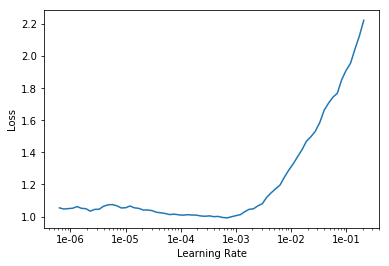

In [15]:
model.recorder.plot()

In [16]:
model.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.020768,1.010791,0.755102,00:46
1,1.158667,0.982627,0.775510,00:45
2,1.154425,0.656708,0.816327,00:47


In [17]:
model.save("stage2");

In [18]:
interpretation = ClassificationInterpretation.from_learner(model)

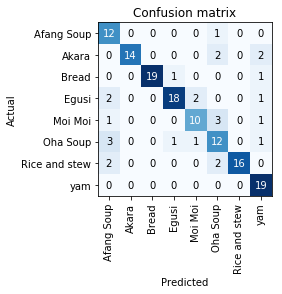

In [19]:
interpretation.plot_confusion_matrix()